# Assignment - Linear Regression

# Problem Statement - 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

# Understanding the Dataset - 

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
car = pd.read_csv(r"C:\Users\himanshuy\Downloads\PGDML\ML Assignment\CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Shape of the dataset
car.shape

(205, 26)

In [4]:
#Infomation about the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# EDA - Visualizing the dataset

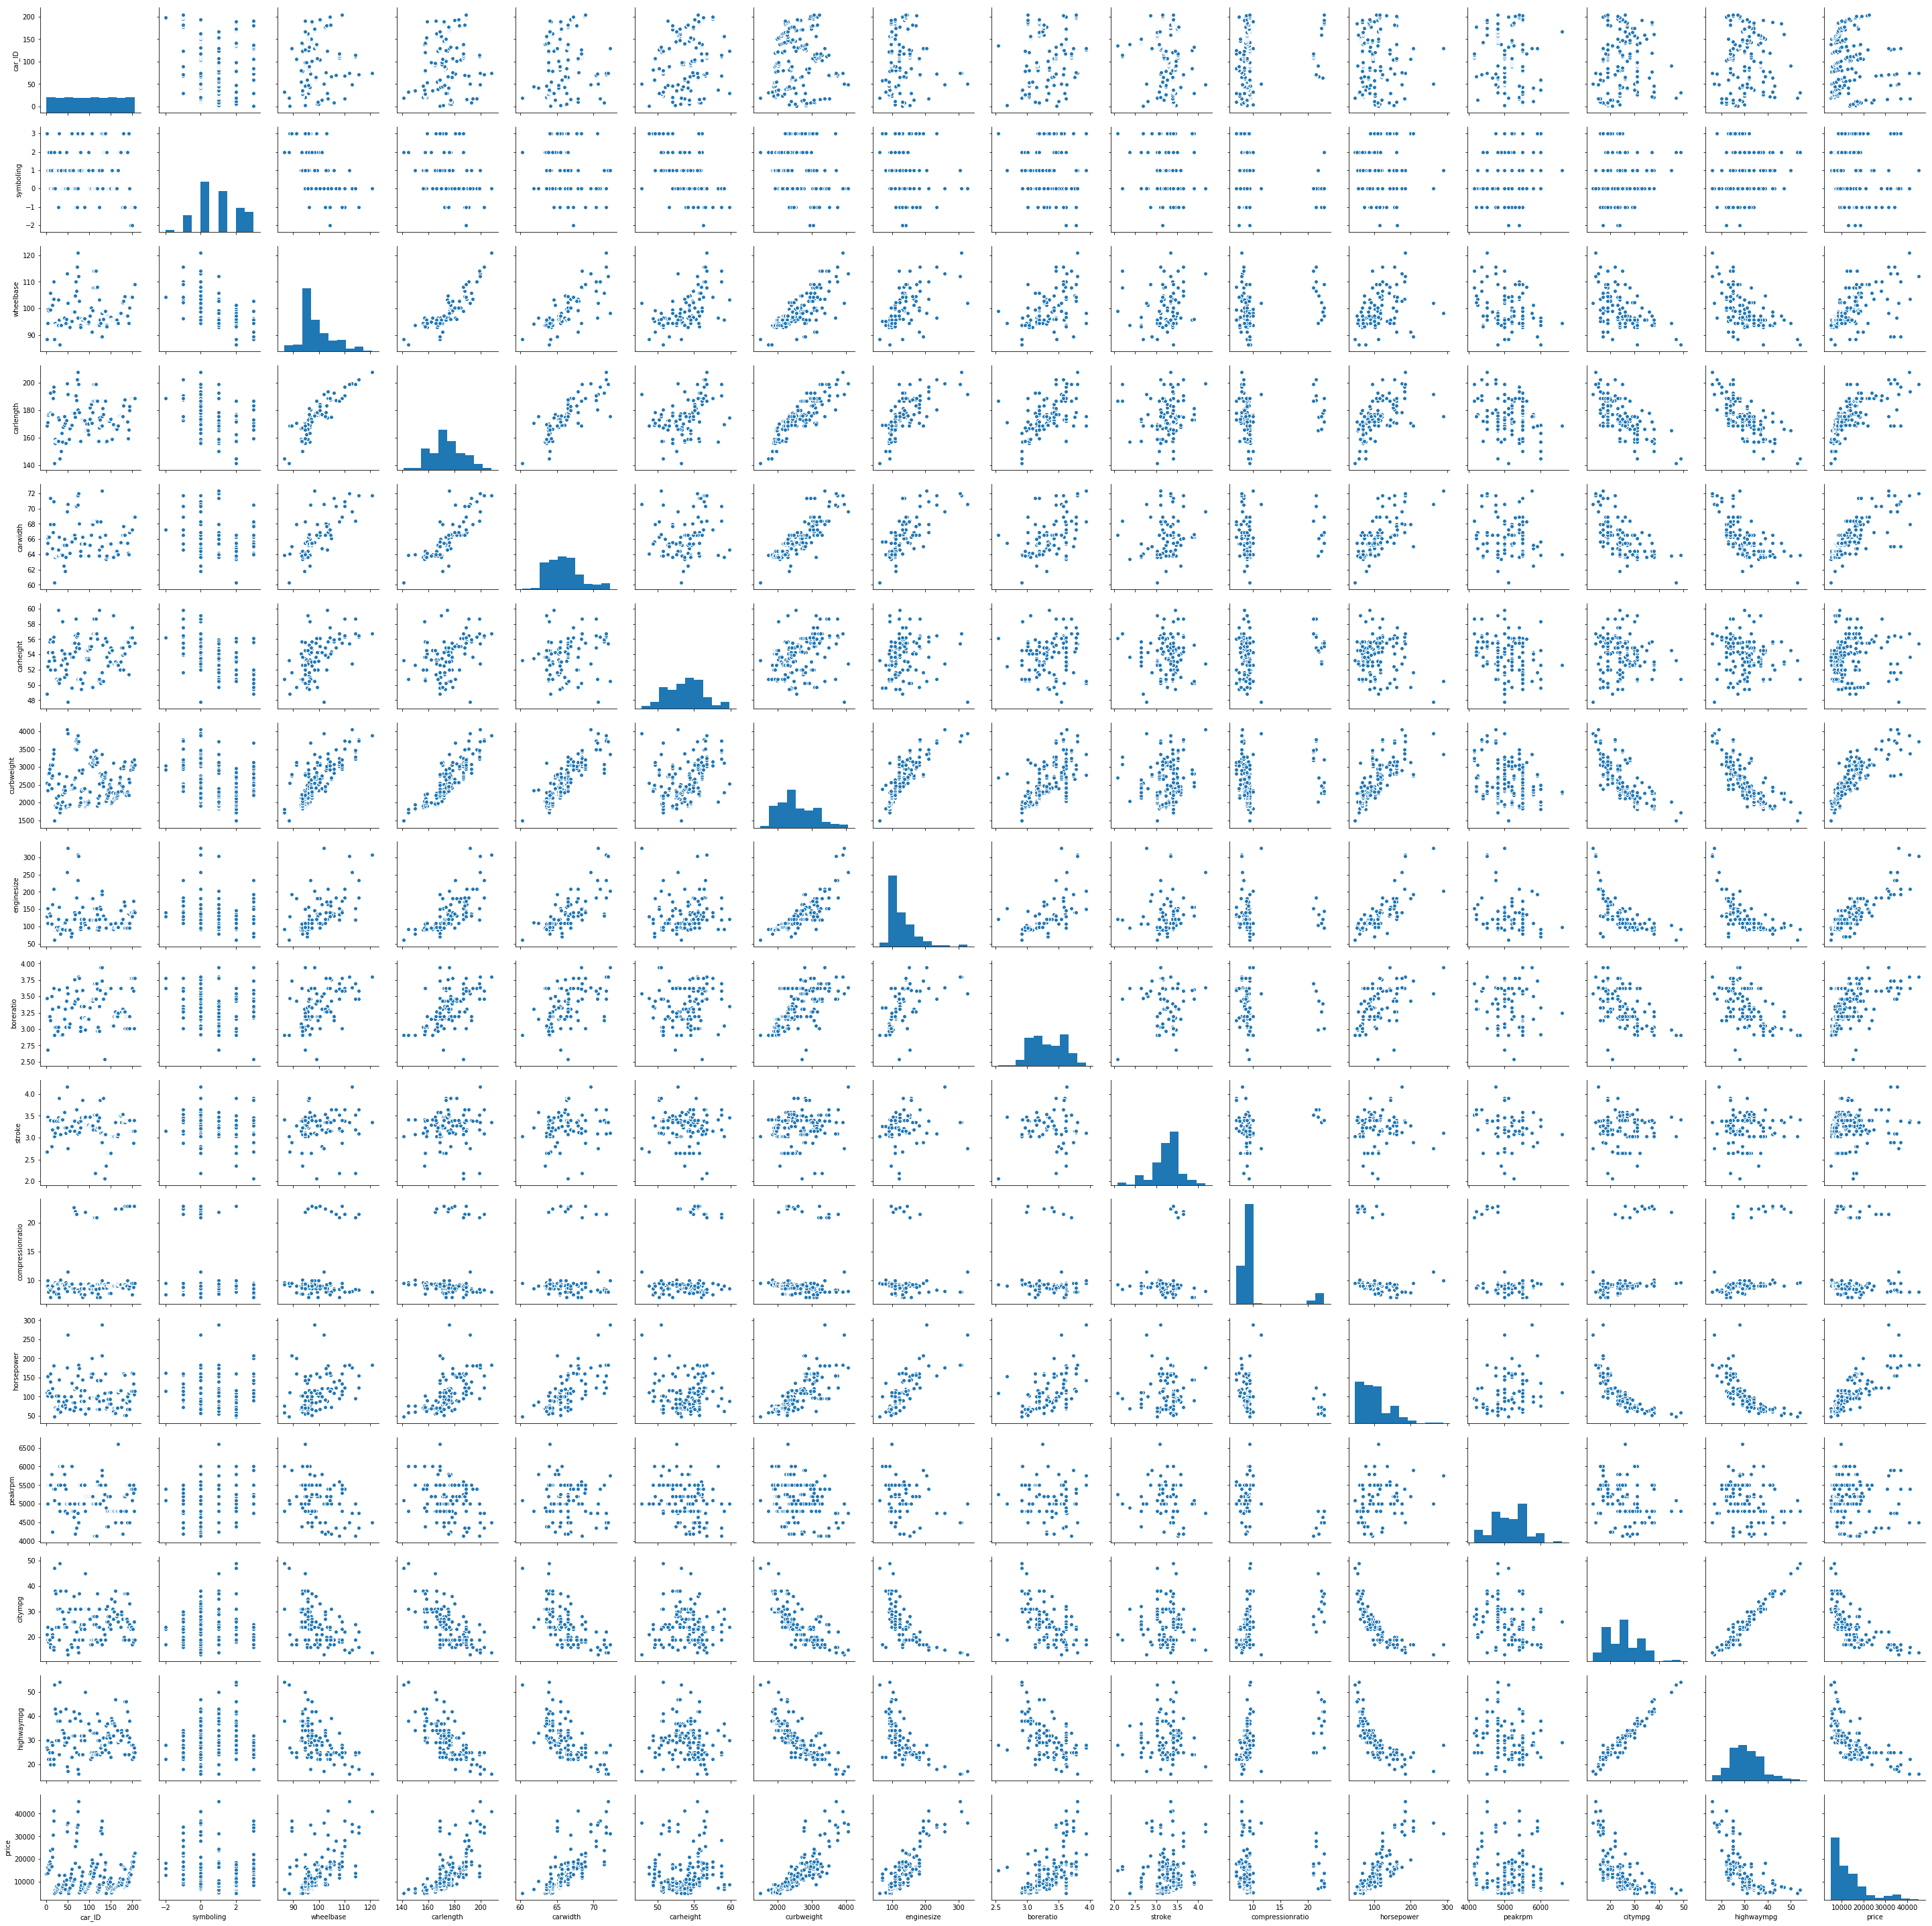

In [6]:
#Plotting pair-plots to see the relationship between the variables
sns.pairplot(car)
plt.show()

As per the pair plots, we see that compressionratio is the only variable which shows different spikes otherwise all other numerical variables follows kind of normal distribution

Text(0.5,1,'Box-Plot Compression Ratio')

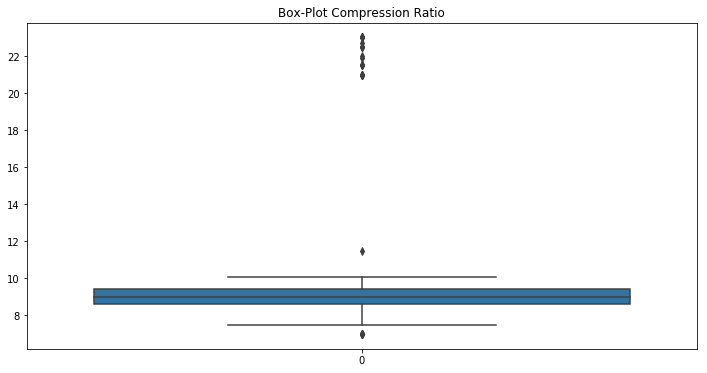

In [7]:
#Box Plot for Compression Ratio
plt.figure(figsize=(12,6))
sns.boxplot(data=car.compressionratio)
plt.title('Box-Plot Compression Ratio')

It seems that most of the values for compressionration lies between 0 to 12 and then after 20

In [8]:
#Checking the percentage of the values of compressionration after 12
compression_ratio = car[['compressionratio']].copy().sort_values(by='compressionratio',ascending=False)
compression_ratio_outlier = car[car['compressionratio']>12]
print(len(compression_ratio_outlier))

20


Out of 205 data values, 20 values seems to be more than 12 which is approximately 10% of the data for that column

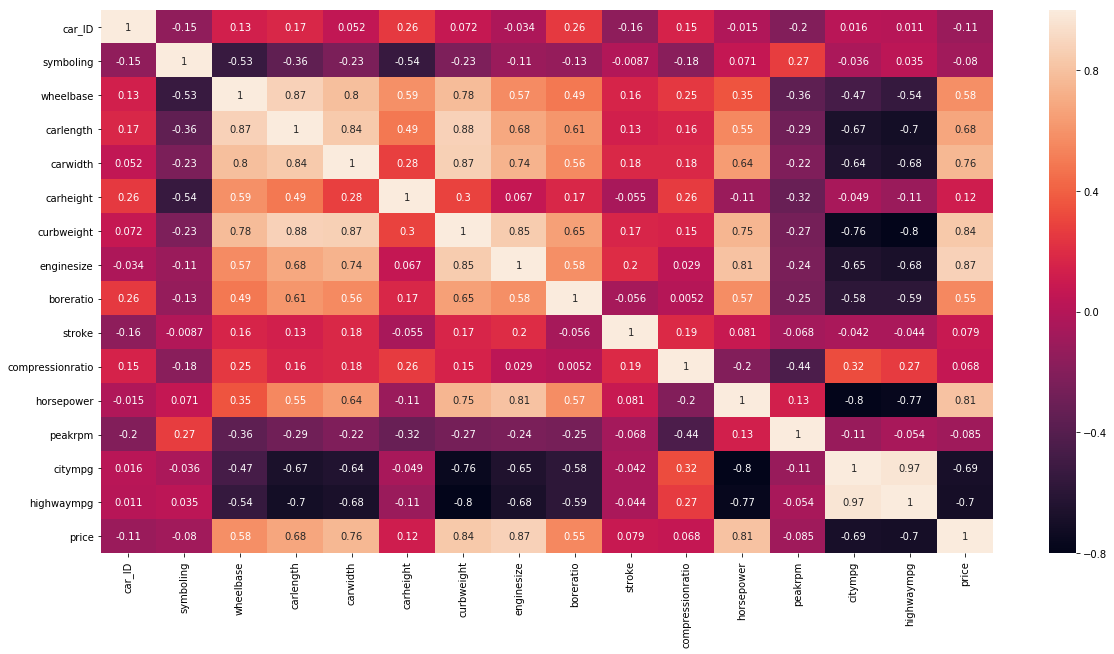

In [9]:
#Checking the heat-map for corelation between the variables
plt.figure(figsize = (20,10))  
sns.heatmap(car.corr(),annot = True)

After understanding the heat map we found out that there is high correlation between citympg and highwaympg. Also, high collinearity exists among wheelbase, carlength, carwidth and curbweight.

In [10]:
#Removing columns including car_ID, wheelbase, carwidth, curbweight and highwaympg
car = car.drop(['car_ID','wheelbase','curbweight','carwidth','highwaympg'], axis=1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


# Data Preparation - 

 CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name.
    We have to consider only the company name

In [11]:
#Splitting the CarName to take only the company name
car['CarName'] = car['CarName'].apply(lambda x:re.split('-| ',x)[0])
car['CarName'].head()

0    alfa
1    alfa
2    alfa
3    audi
4    audi
Name: CarName, dtype: object

In [12]:
#Making all the values of the car name to lower case which handles one case where we were treating nissan and NIssan as two different companies
car.CarName = car['CarName'].str.lower()

In [13]:
car.CarName.value_counts()

toyota        31
nissan        18
mazda         15
honda         13
mitsubishi    13
subaru        12
volvo         11
peugeot       11
volkswagen     9
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        4
isuzu          4
chevrolet      3
jaguar         3
alfa           3
vw             2
maxda          2
renault        2
toyouta        1
mercury        1
porcshce       1
vokswagen      1
Name: CarName, dtype: int64

We found out that there are some entries which are having the same company name but different spelling - 

    vw=volkswagen
    vokswagen=volkswagen
    toyouta=toyota
    porcshce=porsche
    maxda=mazda

In [14]:
#Correctig the above names to handle the data properly
car['CarName'] = car.CarName.str.replace('vw','volkswagen')
car['CarName'] = car.CarName.str.replace('vokswagen','volkswagen')
car['CarName'] = car.CarName.str.replace('toyouta','toyota')
car['CarName'] = car.CarName.str.replace('porcshce','porsche')
car['CarName'] = car.CarName.str.replace('maxda','mazda')

car['CarName'].value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
alfa           3
chevrolet      3
jaguar         3
renault        2
mercury        1
Name: CarName, dtype: int64

We can see that 4 categorical columns fueltype, aspiration, doornumber, enginelocation having only two types of data.

In [15]:
print(car['fueltype'].value_counts())
print(car['aspiration'].value_counts())
print(car['doornumber'].value_counts())
print(car['enginelocation'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64


In [16]:
# Converting categorical variables
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})

In [17]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa,1,1,1,hatchback,rwd,1,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,1,1,0,sedan,fwd,1,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,1,1,0,sedan,4wd,1,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


Dummy values for categorical variables of more than 2 levels - 
As we can se we have few categorial variables like carName, carbody, driveWheel, fuelsystem, cylinderNumber, and engineType

In [18]:
#Creating dummy variables
dummy_car = pd.get_dummies(car)
dummy_car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [19]:
dummy_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
price                    205 non-null float64
CarName_alfa             205 non-null uint8
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
Car

# Data Modelling - 

In [20]:
#Splitting the data into training and testing set 
df_train, df_test = train_test_split(dummy_car, train_size = 0.7, random_state=100)
print(df_train.shape)
df_train.head()

(143, 67)


,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1,1,1,0,1,167.3,50.8,98,2.97,3.23,...,0,0,0,1,0,0,0,0,0,0
125,3,1,1,1,1,168.9,50.2,151,3.94,3.11,...,0,0,0,0,0,0,0,1,0,0
166,1,1,1,1,1,168.7,52.6,98,3.24,3.08,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
199,-1,1,0,0,1,188.8,57.5,130,3.62,3.15,...,0,0,0,0,0,0,0,1,0,0


According to the Data Dictionary - We should not rescale the symboling column as it defines insurance risk rating in range of -3 to +3.

In [21]:
# Scaling the variables except which are numerical and dummy
vars_list = ['price','carlength','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg']
scalar = MinMaxScaler()
df_train[vars_list] = scalar.fit_transform(df_train[vars_list])
df_test[vars_list] = scalar.transform(df_test[vars_list])

In [22]:
#Creating the X_train and y_train
y_train = df_train.pop('price')
X_train = df_train

In [23]:
# RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# choosing top 12 features
rfe = RFE(lm,12)      
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 53),
 ('fueltype', False, 33),
 ('aspiration', False, 8),
 ('doornumber', False, 30),
 ('enginelocation', False, 50),
 ('carlength', True, 1),
 ('carheight', False, 46),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 36),
 ('horsepower', False, 27),
 ('peakrpm', False, 7),
 ('citympg', False, 23),
 ('CarName_alfa', False, 18),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 24),
 ('CarName_dodge', False, 19),
 ('CarName_honda', False, 45),
 ('CarName_isuzu', False, 44),
 ('CarName_jaguar', False, 20),
 ('CarName_mazda', False, 49),
 ('CarName_mercury', False, 52),
 ('CarName_mitsubishi', False, 9),
 ('CarName_nissan', False, 40),
 ('CarName_peugeot', False, 5),
 ('CarName_plymouth', False, 17),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 43),
 ('CarName_saab', False, 13),
 ('CarName_subaru', False, 42),
 ('CarName_toyota', False, 

In [24]:
# selecting the top 12 features
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [25]:
# Dropping variables which are not in the top 12
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'f

In [26]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,carlength,enginesize,boreratio,stroke,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,enginetype_rotor,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,0.426016,0.139623,0.230159,0.525253,0,0,0,0,0,0,0,0
125,0.452033,0.339623,1.000000,0.464646,0,0,0,1,0,0,0,0
166,0.448780,0.139623,0.444444,0.449495,0,0,0,0,0,0,0,0
1,0.450407,0.260377,0.626984,0.247475,0,0,0,0,0,0,0,0
199,0.775610,0.260377,0.746032,0.484848,0,0,0,0,0,0,0,0


In [27]:
#Adding the constant
X_train_rfe_1= sm.add_constant(X_train_rfe)

# 1st model
lr_model_1 = sm.OLS(y_train,X_train_rfe_1).fit()

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.44e-61
Time:                        03:47:36   Log-Likelihood:                 184.86
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     131   BIC:                            -310.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0813      0.030     -2.723      0.007      -0.140      -0.022
carlength                 0.2443      0.052      4.712      0.000       0.142       0.347
enginesize                0.9559      0.082     11.702      0.000       0.794       1.118
boreratio                -0.0945      0.046     -2.065      0.041      -0.185      -0.004
stroke                   -0.0819      0.045     -1.808      0.073      -0.172       0.008
CarName_audi              0.1038      0.034      3.090      0.002       0.037       0.170
CarName_bmw               0.2148      0.032      6.811      0.000       0.152       0.277
CarName_buick             0.1877      0.036      5.157      0.000       0.116       0.260
CarName_porsche           0.3116      0.048      6.481      0.000       0.216       0.407
enginetype_rotor          0.1201      0.019      6.331      0.000       0.083       0.158
cylindernumber_three      0.1342      0.072      1.875      0.063      -0.007       0.276
cylindernumber_twelve    -0.1344      0.093     -1.452      0.149      -0.317       0.049
cylindernumber_two        0.1201      0.019      6.331      0.000       0.083       0.158
==============================================================================
Omnibus:                       15.918   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.875
Skew:                           0.607   Prob(JB):                     1.08e-05
Kurtosis:                       4.537   Cond. No.                     2.29e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From summary what we get:

    F-statistics is 112.8, resulting in the Probablity 3.44e-61, so the overall model fit is significant.
    Adjusted R-squraed value is 0.904, that means 90% variance in price is described by the selected features.

Also, we do see that P value for stroke, cylindernumber_three and cylindernumber_twelve is greater than 0.05

In [28]:
#Caluclating the VIF
vif = pd.DataFrame()
X = X_train_rfe_1.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
0,carlength,24.440000
1,enginesize,14.050000
2,boreratio,13.650000
3,stroke,7.090000
10,cylindernumber_twelve,1.640000
7,CarName_porsche,1.440000
6,CarName_buick,1.370000
5,CarName_bmw,1.230000


cylindernumber_two and enginetype_rotor are showing VIF as inf, because they are highly correlated with each other

In [29]:
#Dropping the variable enginetype_rotor
X_train_rfe_2 = X_train_rfe_1.drop('enginetype_rotor', axis=1)

#2nd Model
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lr_model_2 = sm.OLS(y_train,X_train_rfe_2).fit()

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.44e-61
Time:                        03:47:36   Log-Likelihood:                 184.86
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     131   BIC:                            -310.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0813      0.030     -2.723      0.007      -0.140      -0.022
carlength                 0.2443      0.052      4.712      0.000       0.142       0.347
enginesize                0.9559      0.082     11.702      0.000       0.794       1.118
boreratio                -0.0945      0.046     -2.065      0.041      -0.185      -0.004
stroke                   -0.0819      0.045     -1.808      0.073      -0.172       0.008
CarName_audi              0.1038      0.034      3.090      0.002       0.037       0.170
CarName_bmw               0.2148      0.032      6.811      0.000       0.152       0.277
CarName_buick             0.1877      0.036      5.157      0.000       0.116       0.260
CarName_porsche           0.3116      0.048      6.481      0.000       0.216       0.407
cylindernumber_three      0.1342      0.072      1.875      0.063      -0.007       0.276
cylindernumber_twelve    -0.1344      0.093     -1.452      0.149      -0.317       0.049
cylindernumber_two        0.2401      0.038      6.331      0.000       0.165       0.315
==============================================================================
Omnibus:                       15.918   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.875
Skew:                           0.607   Prob(JB):                     1.08e-05
Kurtosis:                       4.537   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
vif = pd.DataFrame()
X = X_train_rfe_2.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,carlength,24.44
1,enginesize,14.05
2,boreratio,13.65
3,stroke,7.09
9,cylindernumber_twelve,1.64
7,CarName_porsche,1.44
6,CarName_buick,1.37
5,CarName_bmw,1.23
10,cylindernumber_two,1.18
4,CarName_audi,1.17


In [31]:
#Dropping the variable boreratio
X_train_rfe_3 = X_train_rfe_2.drop('boreratio', axis=1)

#3rd Model
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lr_model_3 = sm.OLS(y_train,X_train_rfe_3).fit()

lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.44e-61
Time:                        03:47:36   Log-Likelihood:                 182.57
No. Observations:                 143   AIC:                            -343.1
Df Residuals:                     132   BIC:                            -310.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1118      0.026     -4.257      0.000      -0.164      -0.060
carlength                 0.1937      0.046      4.188      0.000       0.102       0.285
enginesize                0.9093      0.079     11.442      0.000       0.752       1.067
stroke                   -0.0434      0.042     -1.038      0.301      -0.126       0.039
CarName_audi              0.1220      0.033      3.719      0.000       0.057       0.187
CarName_bmw               0.2237      0.032      7.073      0.000       0.161       0.286
CarName_buick             0.1984      0.036      5.441      0.000       0.126       0.270
CarName_porsche           0.2822      0.046      6.071      0.000       0.190       0.374
cylindernumber_three      0.1311      0.072      1.810      0.073      -0.012       0.274
cylindernumber_twelve    -0.0912      0.091     -0.999      0.319      -0.272       0.089
cylindernumber_two        0.2261      0.038      5.986      0.000       0.151       0.301
==============================================================================
Omnibus:                       12.695   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.160
Skew:                           0.575   Prob(JB):                     0.000511
Kurtosis:                       4.105   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
X = X_train_rfe_3.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,enginesize,13.86
0,carlength,13.68
2,stroke,7.08
8,cylindernumber_twelve,1.62
5,CarName_buick,1.34
6,CarName_porsche,1.25
4,CarName_bmw,1.21
9,cylindernumber_two,1.16
3,CarName_audi,1.07
7,cylindernumber_three,1.03


In [33]:
#Dropping the variable enginesize
X_train_rfe_4 = X_train_rfe_3.drop('enginesize', axis=1)

#4th Model
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
lr_model_4 = sm.OLS(y_train,X_train_rfe_4).fit()

lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     60.45
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.09e-42
Time:                        03:47:36   Log-Likelihood:                 133.31
No. Observations:                 143   AIC:                            -246.6
Df Residuals:                     133   BIC:                            -217.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1948      0.035     -5.490      0.000      -0.265      -0.125
carlength                 0.5626      0.047     12.072      0.000       0.470       0.655
stroke                    0.1329      0.055      2.432      0.016       0.025       0.241
CarName_audi              0.0935      0.046      2.031      0.044       0.002       0.184
CarName_bmw               0.3268      0.043      7.669      0.000       0.243       0.411
CarName_buick             0.3460      0.048      7.218      0.000       0.251       0.441
CarName_porsche           0.5266      0.058      9.074      0.000       0.412       0.641
cylindernumber_three      0.1394      0.102      1.368      0.174      -0.062       0.341
cylindernumber_twelve     0.5468      0.102      5.384      0.000       0.346       0.748
cylindernumber_two        0.0864      0.050      1.719      0.088      -0.013       0.186
==============================================================================
Omnibus:                       31.450   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.994
Skew:                           1.089   Prob(JB):                     1.39e-11
Kurtosis:                       4.910   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
X = X_train_rfe_4.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,carlength,7.36
1,stroke,6.62
4,CarName_buick,1.13
3,CarName_bmw,1.12
2,CarName_audi,1.07
7,cylindernumber_twelve,1.06
6,cylindernumber_three,1.03
8,cylindernumber_two,1.03
5,CarName_porsche,1.02


In [35]:
#Dropping the variable stroke
X_train_rfe_5 = X_train_rfe_4.drop('stroke', axis=1)

#5th Model
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
lr_model_5 = sm.OLS(y_train,X_train_rfe_5).fit()

lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     64.89
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.27e-42
Time:                        03:47:36   Log-Likelihood:                 130.20
No. Observations:                 143   AIC:                            -242.4
Df Residuals:                     134   BIC:                            -215.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1329      0.025     -5.278      0.000      -0.183      -0.083
carlength                 0.5812      0.047     12.416      0.000       0.489       0.674
CarName_audi              0.1000      0.047      2.138      0.034       0.007       0.192
CarName_bmw               0.3189      0.043      7.371      0.000       0.233       0.404
CarName_buick             0.3512      0.049      7.201      0.000       0.255       0.448
CarName_porsche           0.5127      0.059      8.719      0.000       0.396       0.629
cylindernumber_three      0.1338      0.104      1.291      0.199      -0.071       0.339
cylindernumber_twelve     0.5079      0.102      4.974      0.000       0.306       0.710
cylindernumber_two        0.0876      0.051      1.711      0.089      -0.014       0.189
==============================================================================
Omnibus:                       43.043   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.759
Skew:                           1.295   Prob(JB):                     1.19e-20
Kurtosis:                       5.947   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
X = X_train_rfe_5.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,carlength,1.33
3,CarName_buick,1.11
2,CarName_bmw,1.09
1,CarName_audi,1.07
4,CarName_porsche,1.02
6,cylindernumber_twelve,1.02
7,cylindernumber_two,1.02
5,cylindernumber_three,1.00


In [37]:
#Dropping the variable cylindernumber_three
X_train_rfe_6 = X_train_rfe_5.drop('cylindernumber_three', axis=1)

#6th Model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
lr_model_6 = sm.OLS(y_train,X_train_rfe_6).fit()

lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     73.56
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.76e-43
Time:                        03:47:36   Log-Likelihood:                 129.32
No. Observations:                 143   AIC:                            -242.6
Df Residuals:                     135   BIC:                            -218.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1250      0.024     -5.105      0.000      -0.173      -0.077
carlength                 0.5675      0.046     12.415      0.000       0.477       0.658
CarName_audi              0.1015      0.047      2.166      0.032       0.009       0.194
CarName_bmw               0.3208      0.043      7.400      0.000       0.235       0.406
CarName_buick             0.3549      0.049      7.272      0.000       0.258       0.451
CarName_porsche           0.5115      0.059      8.678      0.000       0.395       0.628
cylindernumber_twelve     0.5113      0.102      4.996      0.000       0.309       0.714
cylindernumber_two        0.0859      0.051      1.675      0.096      -0.016       0.187
==============================================================================
Omnibus:                       43.769   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.057
Skew:                           1.314   Prob(JB):                     3.76e-21
Kurtosis:                       5.979   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
X = X_train_rfe_6.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,carlength,1.33
3,CarName_buick,1.11
2,CarName_bmw,1.09
1,CarName_audi,1.07
4,CarName_porsche,1.02
5,cylindernumber_twelve,1.02
6,cylindernumber_two,1.02


In [39]:
#Dropping the variable cylindernumber_two
X_train_rfe_7 = X_train_rfe_6.drop('cylindernumber_two', axis=1)

#7th Model
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
lr_model_7 = sm.OLS(y_train,X_train_rfe_7).fit()

lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     84.23
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.37e-43
Time:                        03:47:36   Log-Likelihood:                 127.85
No. Observations:                 143   AIC:                            -241.7
Df Residuals:                     136   BIC:                            -221.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1208      0.025     -4.926      0.000      -0.169      -0.072
carlength                 0.5646      0.046     12.280      0.000       0.474       0.656
CarName_audi              0.0993      0.047      2.105      0.037       0.006       0.193
CarName_bmw               0.3186      0.044      7.305      0.000       0.232       0.405
CarName_buick             0.3531      0.049      7.190      0.000       0.256       0.450
CarName_porsche           0.5087      0.059      8.577      0.000       0.391       0.626
cylindernumber_twelve     0.5094      0.103      4.946      0.000       0.306       0.713
==============================================================================
Omnibus:                       40.771   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.637
Skew:                           1.258   Prob(JB):                     1.87e-18
Kurtosis:                       5.715   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
X = X_train_rfe_7.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,carlength,1.30
3,CarName_buick,1.10
2,CarName_bmw,1.09
1,CarName_audi,1.07
4,CarName_porsche,1.02
5,cylindernumber_twelve,1.02


In [41]:
#Dropping the variable CarName_audi
X_train_rfe_8 = X_train_rfe_7.drop('CarName_audi', axis=1)

#8th Model
X_train_rfe_8 = sm.add_constant(X_train_rfe_8)
lr_model_8 = sm.OLS(y_train,X_train_rfe_8).fit()

lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     97.75
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.98e-43
Time:                        03:47:37   Log-Likelihood:                 125.55
No. Observations:                 143   AIC:                            -239.1
Df Residuals:                     137   BIC:                            -221.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1262      0.025     -5.109      0.000      -0.175      -0.077
carlength                 0.5830      0.046     12.755      0.000       0.493       0.673
CarName_bmw               0.3108      0.044      7.065      0.000       0.224       0.398
CarName_buick             0.3429      0.049      6.929      0.000       0.245       0.441
CarName_porsche           0.5050      0.060      8.415      0.000       0.386       0.624
cylindernumber_twelve     0.4997      0.104      4.796      0.000       0.294       0.706
==============================================================================
Omnibus:                       33.143   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.116
Skew:                           1.118   Prob(JB):                     1.08e-12
Kurtosis:                       5.062   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
X = X_train_rfe_8.drop('const',1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,carlength,1.22
2,CarName_buick,1.10
1,CarName_bmw,1.08
3,CarName_porsche,1.02
4,cylindernumber_twelve,1.02


# Residual Analysis - 

Text(0.5,0,'Errors')

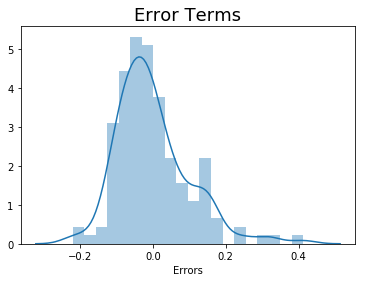

In [43]:
y_train_pred = lr_model_8.predict(X_train_rfe_8)
residual = y_train - y_train_pred

plt.figure()
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 18)     
plt.xlabel('Errors') 

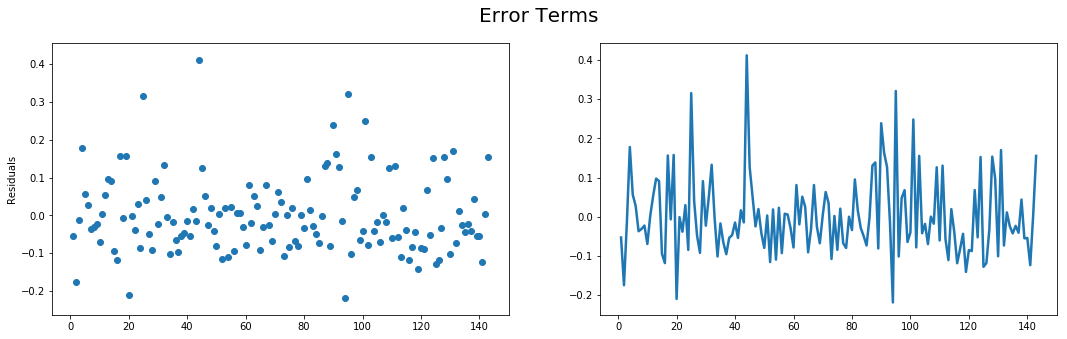

In [44]:
fig = plt.figure(figsize=(18,5))
x_axis_range = [i for i in range(1,144,1)]
fig.suptitle('Error Terms', fontsize=20)

plt.subplot(1,2,1)
plt.scatter(x_axis_range, residual)
plt.ylabel('Residuals')

plt.subplot(1,2,2)
plt.plot(x_axis_range,residual, linewidth=2.5)

So, there is no such patterns in the Error terms, which validates our one of the major assumptions of residuals.

# Predictions - 

In [45]:
#Creating the X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [46]:
X = X_train_rfe_8.drop('const',1)
X_test_1 = X_test[X.columns]

# adding contant
X_test_1 = sm.add_constant(X_test_1)
X_test_1.head()

,const,carlength,CarName_bmw,CarName_buick,CarName_porsche,cylindernumber_twelve
160,1.0,0.409756,0,0,0,0
186,1.0,0.497561,0,0,0,0
59,1.0,0.596748,0,0,0,0
165,1.0,0.448780,0,0,0,0
140,1.0,0.263415,0,0,0,0


In [47]:
#Making prediction using final model
y_pred = lr_model_8.predict(X_test_1)
y_pred.head()

160    0.112727
186    0.163916
59     0.221742
165    0.135478
140    0.027411
dtype: float64

# R-squared score on the test set - 

In [48]:
r2_score(y_test, y_pred)

0.8282502815064747

Text(0,0.5,'y_pred')

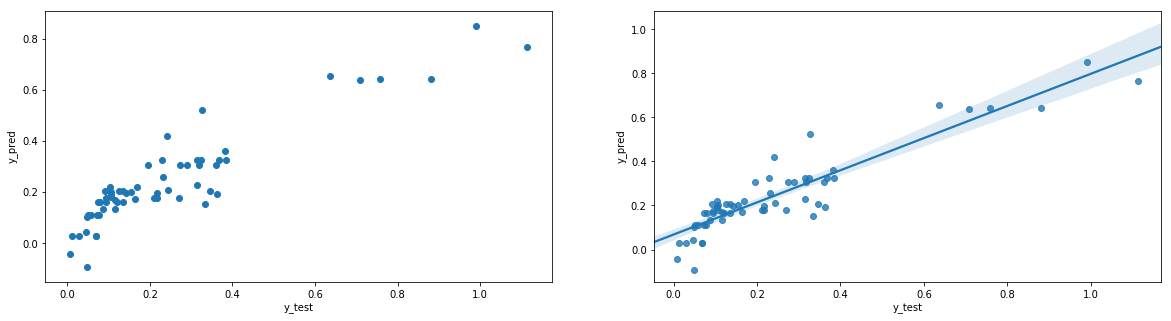

In [49]:
fig = plt.figure(figsize=(20,5))             

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')                          
plt.ylabel('y_pred')                          

plt.subplot(1,2,2)
sns.regplot(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

# Conclusion - 

The final equation of of Best-fitted line:

    price=-0.1262+0.5830×carlength+0.3108×CarNamebmw+0.3429×CarName_buic+0.5050×CarName_porsche+0.4997×cylindernumber_twelve 
               
The variables which are significant in predicting the Price of a car:
      
        carlength
        CarName_bmw
        CarName_buick
        CarName_porsche
        cylindernumber_twelve